<a id="toc_section"></a>
## Contents of this notebook

[**Raghav Rastogi**](https://www.kaggle.com/raghavrastogi75) 


* [Data import](#1)
* [Checking NULL values](#2)
* [Exploratory Data Analysis](#3)
* [Excluding the test set before further analysis](#4)
* [Continuing the EDA](#5)
    - [Visualising the Geographical data](#6)   
    - [Correlation of the data](#7)
    - [Scatter plot for highly correlated attributes](#8)
* [Data Preparation](#9)
* [Machine Learning model selection and training](#10)
* [Evaluation and RMSE](#11)
* [Conclusion](#12)
   

I have referred the book 'Hands-on MAchine Learning with scikit-Learn, Keras, and Tensorflow' by Aurélien Géron and applied on this dataset. I highly recommend it if you are a beginner. If you have a question or feedback, do not hesitate to write and if you find this kernal helpful, please <b><font color="orange">do not forget to </font><font color="green">UPVOTE </font></b> 🙂

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


* # <span id="1"></span> Data import
Let's import the data and have a look at some rows and data types

In [2]:
housing = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
print(housing.info())
#housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# <span id="2"></span> Checking Null Values
Let's check if there are any blank vaules in bulk

In [3]:
import seaborn as sns
housing.isna().count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

There are no 'NULL' values in the data set, however, there are a lot of '0s' in the data set which is fine. Had there been null values, there are 3 ways to approach it:

1. Remove the column itself if it is not important
2. Remove the missing rows if the NULLs are very less
3. Replace the NULL values with the median or mean or '0' in case of numerical columns.

The columns 'yr_renovated', 'sqft_basement', 'view' and 'waterfront' has huge number of '0' values filled. We should check how important they are using correlation.

In [4]:
#removing id and date as they are not important for prediction
housing = housing.drop(columns = ['id','date'])
#print(housing.shape)
                        

# <span id="3"></span> Exploratry Data analysis
Let's a look at the data to know more about it and gain some insights before trying to predict it.

In [5]:
#looking at the data types
housing.dtypes


price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

All of the datatypes are either integers or floats

In [6]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Let's plot a histogram to get a better feel of the data

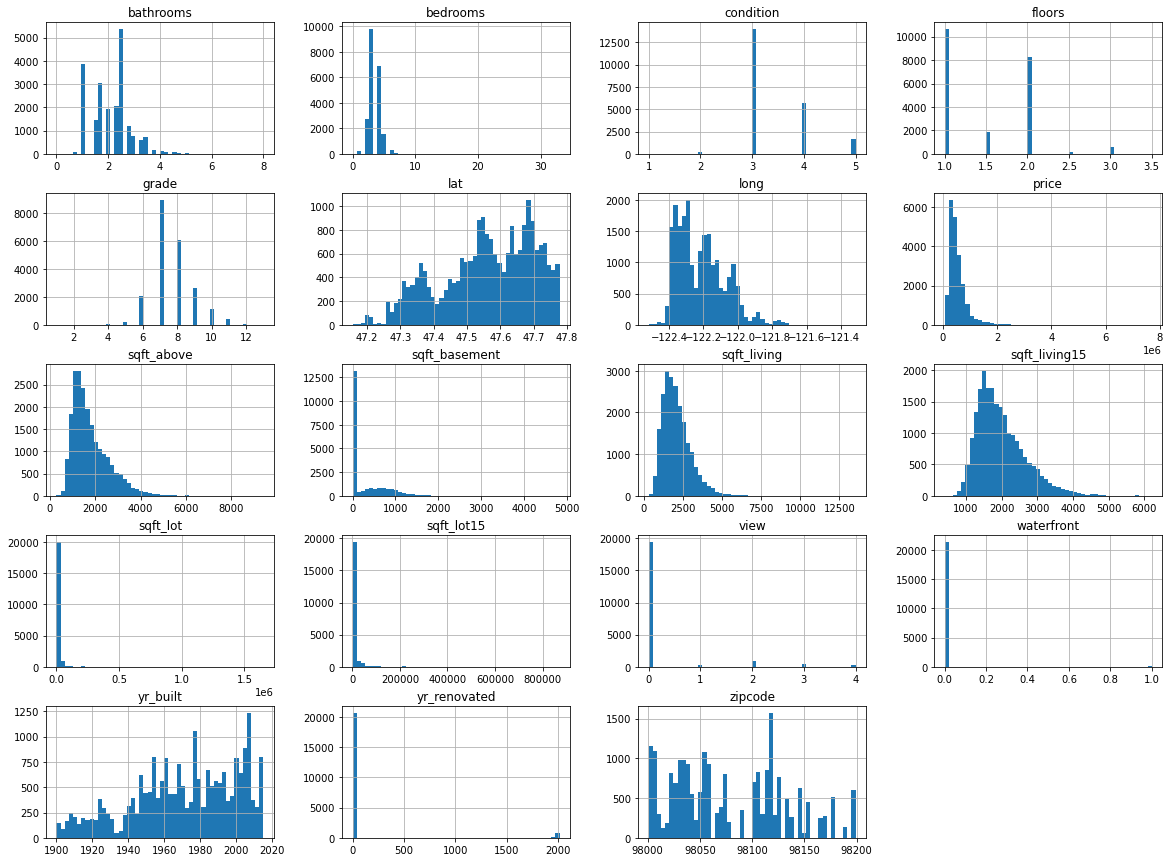

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

We first observe that some are categorical and some are continuos. For example 'view' and 'condition' are categorical. Also many histograms are tail heavy: they extend much farther to the right of the median than to the left. This might make the ML Algorithms a little harder to detect patterns. We will have to use Standardisation to make them symmetrical suc that ML algos are able to perform better on the dataset.

# <span id="4"></span> Excluding the test set before further analysis

I am doing this to ensure that I have no insight whatsoever about the test set and this will help in getting completely unbiased results in the end.

We use stratified shuffle split to evenly separate the training set and test set from the total data. For example we a male/female values on the data as 60%/30%, we would have the same distribution of the male/female ratio in our data set. Using this strategy makes our validation set much more reliable.


Let's choose 'year built' as the criteria of stratified shuffle shift as it seems like a good distributed factor of the data. Plotting it to get a view of the distribution.

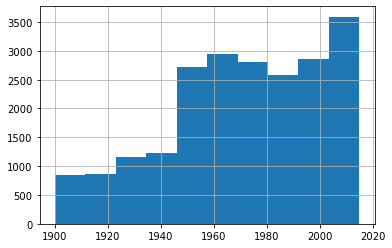

In [8]:
housing['yr_built'].hist()


Looking at the numerical values.

In [9]:
housing["year_cat"] = pd.cut(housing["yr_built"],bins=[0, 1920, 1940, 1960, 1980,2000, np.inf], labels=[1, 2, 3, 4, 5,6])
housing["year_cat"].value_counts()

4    4937
6    4541
5    4498
3    4308
2    1780
1    1549
Name: year_cat, dtype: int64

As we can see we have a good enough values for each 20 year bucket. This makes sure that we are not using an uneven distribution as out test test.

Separating the test set from the data

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(housing, housing["year_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
# looking at the percentage wise distribution of bucket of years
strat_test_set["year_cat"].value_counts() / len(strat_test_set)
    

4    0.228314
6    0.210039
5    0.208189
3    0.199399
2    0.082350
1    0.071709
Name: year_cat, dtype: float64

# <span id="5"></span> Continuing the EDA
Now that we are done with the separation of train and test set. Lets explore the train set more.

In [11]:
housing = strat_train_set.copy()


## <span id="4"></span>Visualising the geographical data

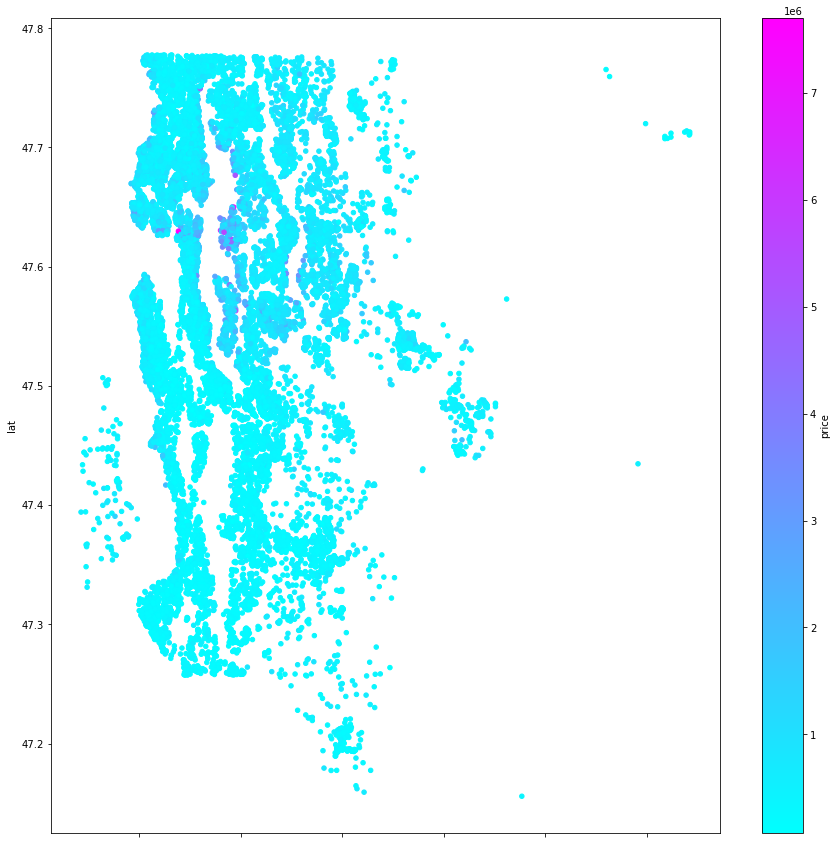

In [12]:
housing.plot(kind = 'scatter', x = 'long', y = 'lat', alpha = 2, figsize = (15,15),c = 'price',colorbar = True,cmap=plt.get_cmap("cool"))


We are kind of able to see the boundaries of the actual location and where the densities are higher. We are also able to see the darker areas with a higher price.

## <span id="7"></span> Correlation of the data


price            1.000000
sqft_living      0.702518
grade            0.662041
sqft_above       0.608332
sqft_living15    0.581522
bathrooms        0.521684
view             0.397170
sqft_basement    0.317562
bedrooms         0.307094
lat              0.303490
waterfront       0.289866
floors           0.258416
yr_renovated     0.128151
sqft_lot         0.085196
sqft_lot15       0.081686
yr_built         0.054986
condition        0.038167
long             0.029536
zipcode         -0.063403
Name: price, dtype: float64


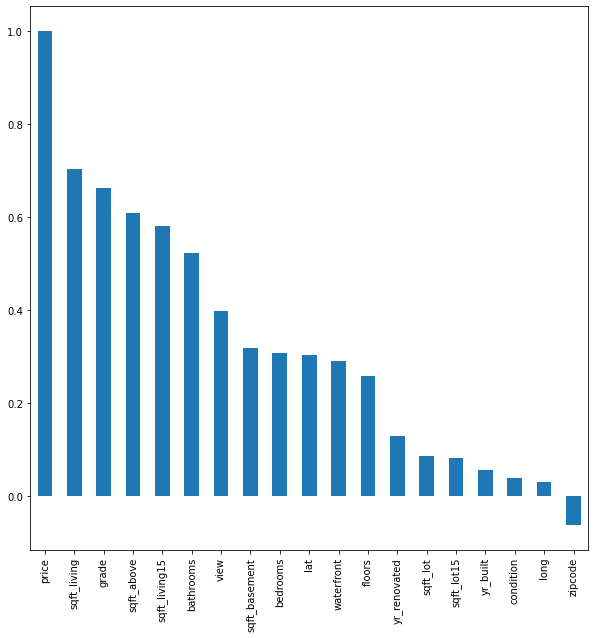

In [13]:
corr_matrix = housing.corr()
plt.figure(figsize = (10,10))
s = corr_matrix['price'].sort_values(ascending = False)
print(s)
s.plot.bar()


We observe that sqft_living has the highest correlation with the price of the house which seems natural. Followed by 'grade' and 'Sqft_above'

## <span id="8"></span> Scatter plot for highly correlated attributes
Let's now have a look at the scatter plot with the price and other highly correlated attributes

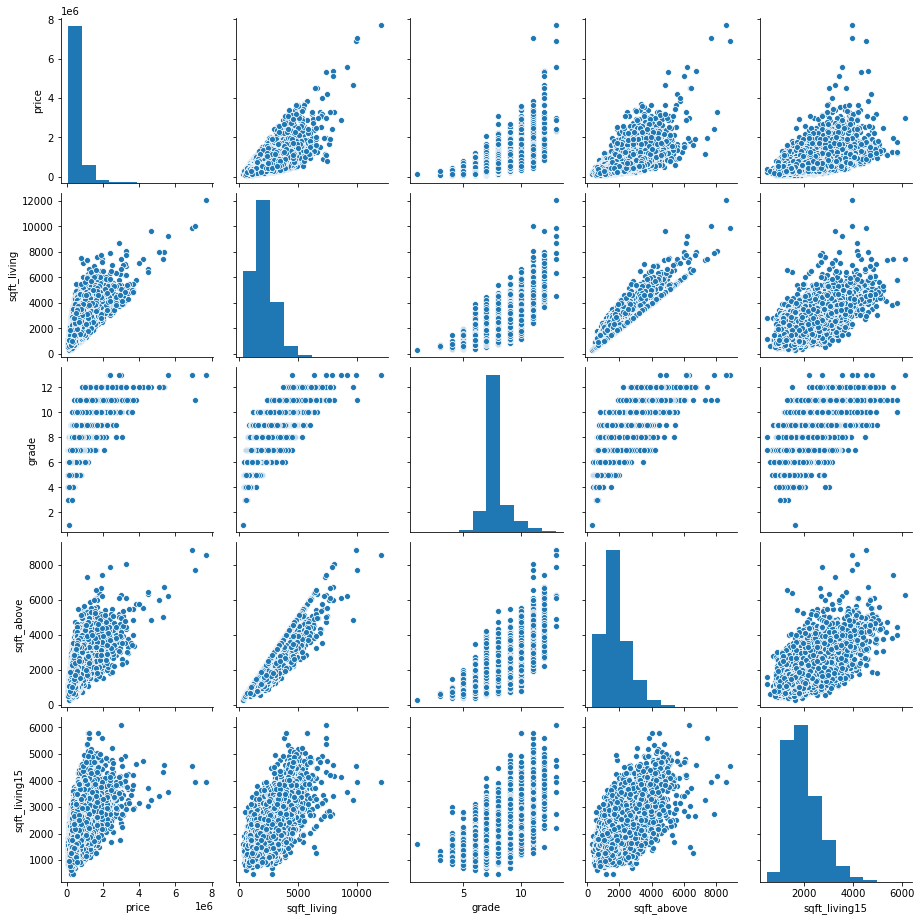

In [14]:
import seaborn as sns
attributes = ['price','sqft_living','grade','sqft_above','sqft_living15']
housing_at = housing.loc[:,attributes]
#print(housing_at)
sns.pairplot(housing_at)
plt.show()




We can now clearly observe the linear correlation of the attributes specially with the price.

## Looking at the most correlated attribute even closer
Let's have a look at the most correlated attribute more closely.

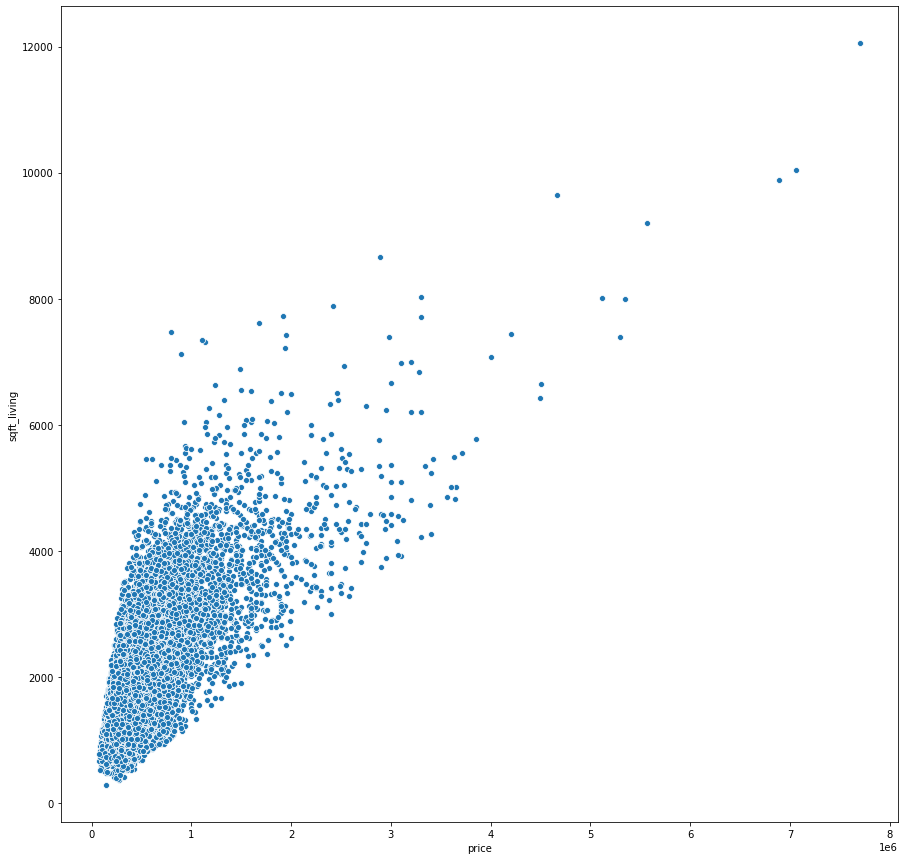

In [15]:
plt.figure(figsize = (15,15))
sns.scatterplot(x = housing['price'], y = housing['sqft_living'])

We do have some outliers but they are along the same trend. So we are good to keep these. 

# <span id="9"></span> Data Preparation
Let's now prepare the data to perform Machine Learning.

In [16]:
housing = strat_train_set.drop("price", axis=1)
housing_labels = strat_train_set["price"].copy()

Let's now scale the data using StandardScaler which will subtract the mean value so that mean is 0 and then divide by standard deviation so that it has unit variance. Using pipeline for it's implementation.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

housing_std_train = num_pipeline.fit_transform(housing)
housing_prepared = pd.DataFrame(housing_std_train, columns=housing.columns, index=housing.index)
housing_prepared
housing_labels = np.log1p(housing_labels)

# <span id="10"></span> Machine learning model selection and training
Now it's time to finally select and train a model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
param_grid = [
{'n_estimators': [25,50], 'max_features': [8 ,10, 15]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

Looking at the best parameters

In [19]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 50}

We can keep changing the max features and n_estimators to get the best value

In [20]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
#print(strat_train_set.columns.tolist())
sorted(zip(feature_importances,housing.columns.tolist()),reverse = True)

[(0.28566079264791405, 'lat'),
 (0.2072450283499656, 'grade'),
 (0.2006883226350671, 'sqft_living'),
 (0.062070209736871176, 'sqft_living15'),
 (0.053771659838527955, 'sqft_above'),
 (0.03829336534193532, 'long'),
 (0.025050471844266717, 'yr_built'),
 (0.022541917375578466, 'bathrooms'),
 (0.01955103591571989, 'zipcode'),
 (0.018629176199272138, 'sqft_lot15'),
 (0.017844751808800453, 'sqft_lot'),
 (0.012349604464873938, 'view'),
 (0.008209987351758565, 'bedrooms'),
 (0.0075361454987374, 'year_cat'),
 (0.006614421762111594, 'sqft_basement'),
 (0.00506545998463391, 'waterfront'),
 (0.0049865393359472395, 'condition'),
 (0.002205280244124628, 'floors'),
 (0.0016858296638938652, 'yr_renovated')]

As expected we get 'sqft_living' as the best attribute to predict the price of the house.

# <span id="11"></span> Evaluation and RMSE
Evaluating the model on test set

In [21]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()
X_test_prepared = num_pipeline.transform(X_test)
y_test_prep = np.log1p(y_test)
final_predictions = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test_prep, final_predictions,squared = False)
print(final_rmse)

0.1792028165613257


We get a decent enough RMSE score. We can try different models to reduce this number further down.

## 95% confidence range
Finally let's get a 95% confidence range ont the predicted values

In [22]:
from scipy import stats
confidence = 0.95
squared_errors = (np.expm1(final_predictions) - np.expm1(y_test_prep)) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([116249.83560405, 134448.27919198])

# <span id="12"></span> Conclusion

This is my first attempt at end to end EDA and Machine Learning prediction. Please let me know how I can improve this code even more.